### Zadanie 1, 2, 3

In [1]:
class Hashmap:
    def __init__(self, hash_f, n):
        self._len = n
        self._array = n * [None]
        self._hash_f = hash_f
        self._hash_g = None
        self.collision_detecting = self.chaining

    def insert_key(self, key):
        index = self._hash_f(key)
        self.collision_detecting(index, key)

    def chaining(self, index, key):
        if self._array[index] is None:
            self._array[index] = [key]
        elif key not in self._array[index]:
            self._array[index].append(key)

    def linear_probing(self, index, key):
        i = index
        while self._array[i] is not None:
            i = (i+1) % self._len
            if i == index:
                raise Exception('Tablica asocjacyjna jest pełna!')
        self._array[i] = key

    def other_hash_function(self, index, key):
        if self._array[self._hash_f(key)] is not None:
            for i in range(1, self._len + 1):
                j = (self._hash_f(key) + i * self._hash_g(key)) % self._len
                if self._array[j] is None:
                    self._array[j] = key
                    break
        else:
            self._array[self._hash_f(key)] = key

    def set_collision_detecting_to_chaining(self):
        self.collision_detecting = self.chaining

    def set_collision_detecting_to_linear_probing(self):
        self.collision_detecting = self.linear_probing

    def set_collision_detecting_to_other_hash_function(self, hash_g):
        self.collision_detecting = self.other_hash_function
        self._hash_g = hash_g

    def __str__(self):
        return str(self._array)

    def clear(self):
        for i in range(self._len):
            self._array[i] = None


hash_map = Hashmap(lambda x: (3*x+5) % 11, 11)
keys_1 = [12, 44, 13, 88, 23, 94, 11, 39, 20, 16, 5]
for key in keys_1:
    hash_map.insert_key(key)
print(hash_map)

hash_map.set_collision_detecting_to_linear_probing()
hash_map.clear()
for key in keys_1:
    hash_map.insert_key(key)
print(hash_map)

hash_map.set_collision_detecting_to_other_hash_function(lambda x: 7 - (x % 7))
hash_map.clear()
for key in keys_1:
    hash_map.insert_key(key)
print(hash_map)

[[13], [94, 39], None, None, None, [44, 88, 11], None, None, [12, 23], [16, 5], [20]]
[13, 94, 39, 16, 5, 44, 88, 11, 12, 23, 20]
[13, 94, 23, 88, 39, 44, 11, 5, 12, 16, 20]


### Zadanie 4

![Strona bez tytułu (1).png](<attachment:Strona bez tytułu (1).png>)
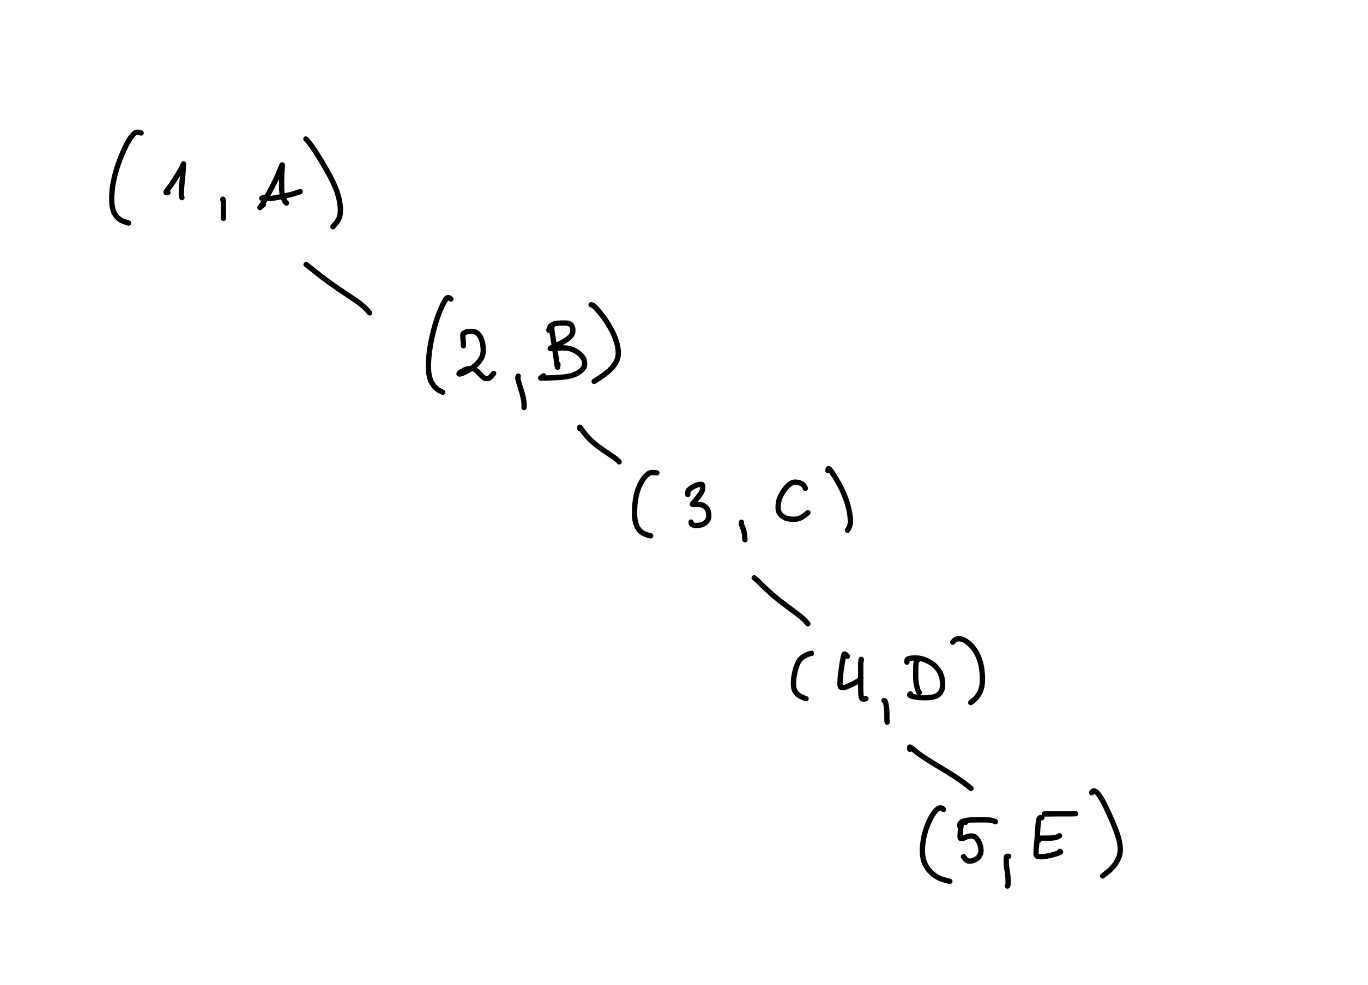

### Zadanie 5

![Strona bez tytułu.png](<attachment:Strona bez tytułu.png>)
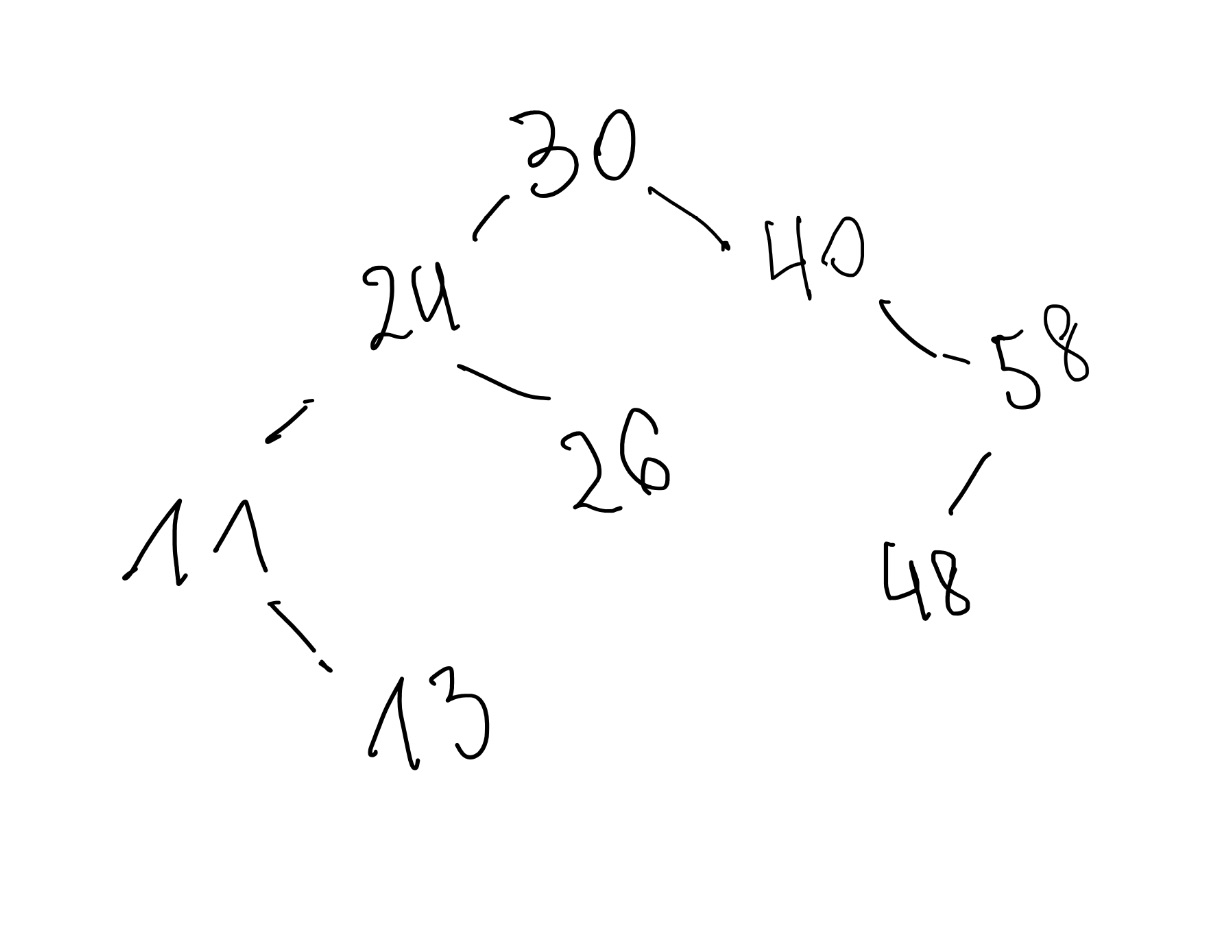

### Zadanie 6

In [5]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr

    stack = [(0, len(arr) - 1)]

    while stack:
        low, high = stack.pop()

        pivot_index = partition(arr, low, high)

        if pivot_index - 1 > low:
            stack.append((low, pivot_index - 1))

        if pivot_index + 1 < high:
            stack.append((pivot_index + 1, high))

    return arr


def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1

    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]

    arr[i + 1], arr[high] = arr[high], arr[i + 1]

    return i + 1


arr = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5]
quicksort(arr)
print(arr)

[1, 1, 2, 3, 3, 4, 5, 5, 5, 6, 9]


### Zadanie 7

In [ ]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import random
import numpy as np
from PIL import Image
from io import BytesIO

help_arr = []
states = []


def mergesort(arr):
    global help_arr
    help_arr = arr.copy()
    states.append(arr.copy())
    merge(arr, 0, len(arr) - 1)
    return arr


def merge(arr, low, high):
    global help_arr
    center = (low + high) // 2
    if high - low <= 0:
        return
    merge(arr, low, center)
    merge(arr, center + 1, high)
    i = low
    j = center + 1
    k = low
    while i <= center and j <= high:
        if arr[i] <= arr[j]:
            help_arr[k] = arr[i]
            i += 1
        else:
            help_arr[k] = arr[j]
            j += 1
        k += 1
        states.append(help_arr.copy())

    while i <= center:
        help_arr[k] = arr[i]
        i += 1
        k += 1
        states.append(help_arr.copy())
    while j <= high:
        help_arr[k] = arr[j]
        j += 1
        k += 1
        states.append(help_arr.copy())
    for k in range(low, high + 1):
        arr[k] = help_arr[k]


# Funkcja generująca wykres
def create_plot(x, y):
    plt.bar(x, y)
    plt.ylim(np.min(x) - 1, np.max(x) + 1)

    image_bytes = BytesIO()
    plt.savefig(image_bytes, format='png')
    plt.close()
    return image_bytes.getvalue()

def animate(arr, values):
    frames = []
    for y in values:
        frame = create_plot(arr, y)
        frames.append(Image.open(BytesIO(frame)))

    # Tworzenie gifa
    gif_bytes = BytesIO()
    frames[0].save(
        gif_bytes,
        format='GIF',
        save_all=True,
        append_images=frames[1:],
        duration=20,
        loop=0
    )

    with open('mergesort.gif', 'wb') as f:
        f.write(gif_bytes.getvalue())


n = 100
arr = np.arange(n) + 1
random.shuffle(arr)
mergesort(arr)
animate(np.arange(n) + 1, states)